In [49]:
from commonfunctions import *
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import skimage
from skimage.color import rgb2gray
from skimage.morphology import disk, square, rectangle as rect

from skimage.morphology import(binary_erosion, 
                               binary_dilation,
                               binary_closing,
                               skeletonize,
                               thin,
                               opening
                              )
from skimage.measure import find_contours
from skimage.filters import rank
from skimage.draw import rectangle
from skimage.filters import threshold_otsu, gaussian
from skimage import feature


In [108]:
import cv2
if ' ':
    print('hi')
    
def cv_show(image):
    image=np.uint8(image)
    cv2.imshow("image", image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

hi


In [51]:
# omar do those
def which_number(num_image):
    """
    returns: zero is image wasn't a number
    or returns the number that it represents either
    1, 2, 3, 4, ...., 9
    
    arguments:
    num_image: this is an image of small size
    """
    pass

def which_symbol_division(sym_image):
    """
    returns which duration eg, if a/4 return 4, if a/8 return 8, if a/16, a/32 
    if not any one return 0
    
    arguments:
    sym_image: this is an image of small size
    """
    pass



In [52]:
# atia do this


def number_of_beams(sym_image):
    """
    returns the number of beams that are found in beaming symbols    
    arguments:
    sym_image: this is an image of small size
    """
    pass

def filled_holes_centers(sym_image):
    """
    returns: the centers of the filed holes found in the sym_image
    eg: [(x1,y1), (x2,y2)]
    arguments:
    sym_image: this is an image of small size
    """
    pass

def which_accidentals(sym_image):
    """
    returns: accidental is found in that image
    returns '#' if # or '&' if b or ' '(space) if neutral '##' if X '&&' if bb
    or return ''(empty) or None if not any of these
    arguments:
    sym_image: this is an image of small size
    """
    pass

In [53]:
# cv2  common functions
def remove_horizontal_lines_old(image):
    if len(image.shape) != 2:
        gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    else:
        gray = image
    thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
    gray=255 - thresh
    # Remove horizontal
    
    kernel_width = image.shape[1] // 3
    horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_width,1))
    detected_lines = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, horizontal_kernel, iterations=2)
    cnts = cv2.findContours(detected_lines, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]

    cv2.drawContours(gray, cnts, -1, 255, 2)

    # Repair image
    repair_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,6))
    result =cv2.morphologyEx(255 - gray, cv2.MORPH_CLOSE, repair_kernel, iterations=1)
    result[result < 100]= 0 
    result [result >= 100] = 255
    return result

def remove_horizontal_lines(image, staff_height=3):
    return binary_erosion(image, selem=rect(staff_height,1))

In [153]:
# common functions
def binary_opening(img, selem):
    return binary_dilation(binary_erosion(img, selem=selem), selem=selem)
def get_bounding_boxes(img,box_aspect_ratio):
    """
    summary: this function returns the bounding boxes sorted according to x-min
    parameter:
    img: is a binary image for which to find the contours 
    aspect_ratio: is a tuple where (low_aspect_ratio,high_aspect_ratio)
    """
    contours = find_contours(img,.8)
    bounding_boxes=[]
    for contour in contours:
        Xmin= np.min(contour[:,1])
        Xmax=np.max(contour[:,1]) 
        Ymin=np.min(contour[:,0])
        Ymax = np.max(contour[:,0])
        if(Ymax-Ymin != 0):
            aspect_ratio = (Xmax-Xmin)/(Ymax-Ymin)
        else:
            aspect_ratio = 3000
            
        if aspect_ratio >= box_aspect_ratio[0] and aspect_ratio <= box_aspect_ratio[1]:
            bounding_boxes.append([int(round(Xmin)),int(round(Xmax)),int(round(Ymin)),int(round(Ymax))])
    def x_min(shape):
        return shape[0]
               
                
    bounding_boxes = sorted(bounding_boxes, key=x_min)
    return bounding_boxes


def get_bounded_image(img,bounding_boxes):
    conte = np.zeros(img.shape)
    for box in bounding_boxes:
        [Xmin, Xmax, Ymin, Ymax] = box
        rr, cc = rectangle(start = (Ymin,Xmin), end = (Ymax,Xmax), shape=img.shape)
        rr = rr.astype(np.int)
        cc= cc.astype(np.int)
        conte[rr, cc] = 1 #set color white
    img2 = np.where(conte==1, img, 0)
    return img2
def draw_bounding_boxes(img,bounding_boxes):
    conte = np.zeros(img.shape)
    for box in bounding_boxes:
        [Xmin, Xmax, Ymin, Ymax] = box
        rr, cc = rectangle(start = (Ymin,Xmin), end = (Ymax,Xmax), shape=img.shape)
        rr = rr.astype(np.int)
        cc= cc.astype(np.int)
        conte[rr, cc] = 1 #set color white
    img2 = np.where(conte==1, img, 0)
    show_images([conte,img2], ['bounding_boxes','original segmented'])


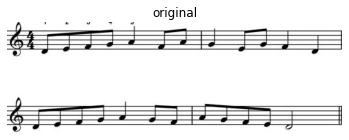

In [55]:
images_paths = ['images/music1.JPG','images/8th_Sheet1.jpeg']

original_image = io.imread(images_paths[1])
gray_image = rgb2gray(original_image)
binary_image = binarize(gray_image)
inverted_image = 255 - binary_image
show_images([original_image],['original'])

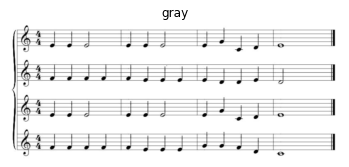

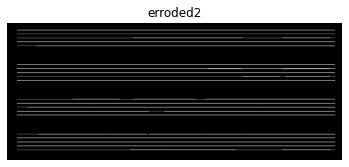

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


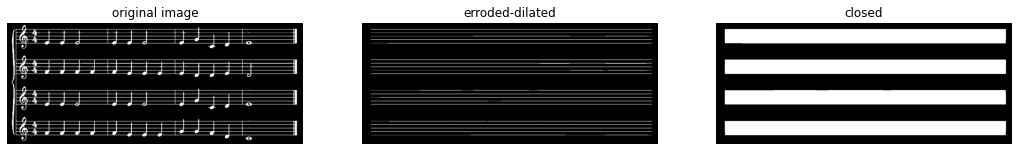

48419


In [156]:
images_paths = ['images/music1.JPG','images/8th_Sheet1.jpeg']

original_image = io.imread(images_paths[0])
gray_image = rgb2gray(original_image)
show_images([gray_image], ['gray'])
binary_image = binarize(gray_image)
inverted_image = 255 - binary_image

inverted_image[:, inverted_image.shape[1]-1]=0
rows=1
cols=image.shape[1] // 4
selem = rect(rows,cols)
erroded_img = binary_erosion(inverted_image,selem=selem)

rows=1
cols=image.shape[1] // 4
selem = rect(rows,cols)
erroded_img2 = binary_dilation(erroded_img, selem=selem)
# inverted_image2 = inverted_image - erroded_img2

show_images([erroded_img2], ['erroded2'])
print(erroded_img)
rows = image.shape[0] // 4
cols = 1
selem = rect(rows,cols)
closed_img  = binary_closing(erroded_img2, selem = selem)
closed_img  = binary_closing(closed_img, selem = selem)
show_images([inverted_image,erroded_img2,closed_img],['original image','erroded-dilated','closed'])

staffs_area = np.sum(erroded_img2)
print(staffs_area)

In [157]:
#  calculate the trace bounding boxes
trace_bounding_boxes = get_bounding_boxes(closed_img,(10,4000))
# print(trace_bounding_boxes)
bigger_trace_bounding_boxes = []
trace_images_array = []
division_height=0
trace_height = 0
for box in trace_bounding_boxes:
    trace_height = box[3]-box[2]
    trace_width = box[1] - box[0]
    division_height = (trace_height)/4
    division_height = int(np.ceil(division_height)) 
#     division_height *=2
    [Xmin, Xmax, Ymin, Ymax] = [int(round(x)) for x in box]
    Ymin -= 2 * division_height
    Ymin = Ymin if Ymin >0 else 0
    Ymax += 2 * division_height
    bigger_trace_bounding_boxes.append([Xmin, Xmax, Ymin, Ymax])
    
    trace_images_array.append(gray_image[Ymin:Ymax,Xmin:Xmax])
staff_length = bigger_trace_bounding_boxes

print(staffs_area, trace_width)

print(staffs_area // (len(bigger_trace_bounding_boxes) * 5 *trace_width ))

# print(bigger_trace_bounding_boxes)
# print(inverted_image.shape)

48419 1307
1


[40, 1348, 0, 128]


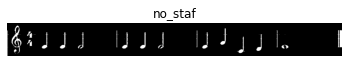

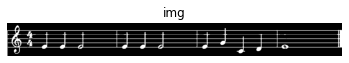

[41, 1348, 136, 270]


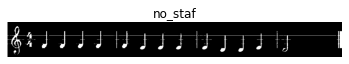

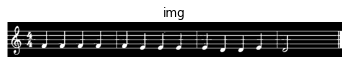

[41, 1348, 278, 412]


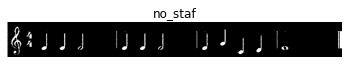

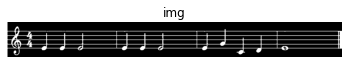

[41, 1348, 422, 555]


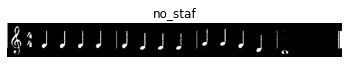

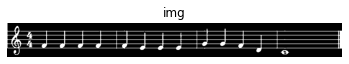

In [158]:
# for each trace segment the individual characters
staff_images = []
gray_staff_images=[]

for trace in bigger_trace_bounding_boxes:
    [Xmin, Xmax, Ymin, Ymax] = [x for x in trace]
    print(trace)
    no_staf = remove_horizontal_lines(inverted_image[Ymin:Ymax,Xmin:Xmax])
    show_images([no_staf], ['no_staf'])
    show_images([inverted_image[Ymin:Ymax,Xmin:Xmax]], ['img'])
    
    staff_images.append(inverted_image[Ymin:Ymax,Xmin:Xmax])    
    gray_staff_images.append(gray_image[Ymin:Ymax,Xmin:Xmax])


[40, 1348, 0, 128]


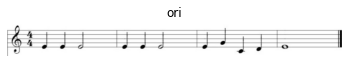

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 1 1 ... 0 0 0]
 [0 1 1 ... 0 0 0]
 [0 1 1 ... 0 0 0]]
shape is  (128, 1308)
shape is  (128, 1308)


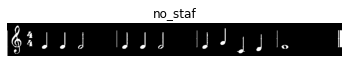

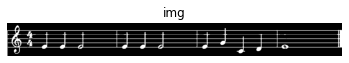

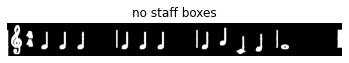

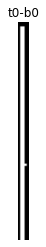

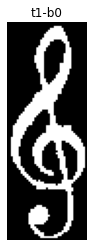

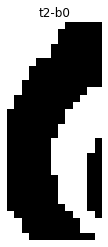

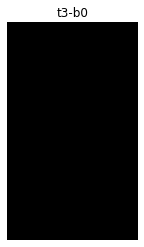

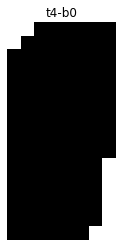

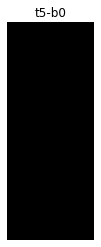

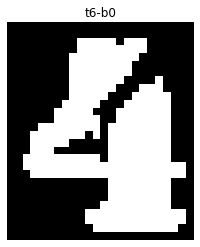

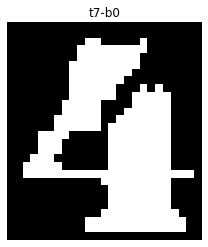

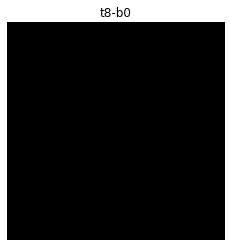

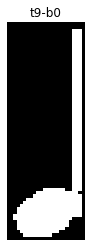

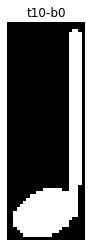

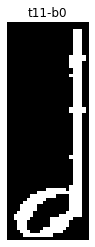

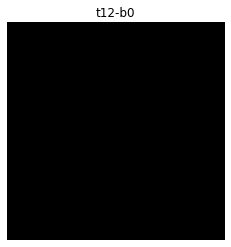

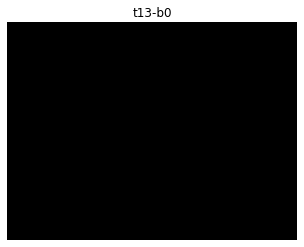

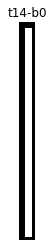

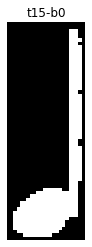

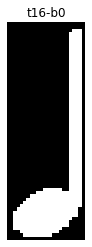

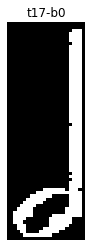

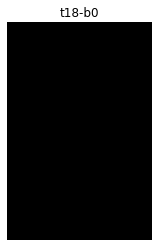

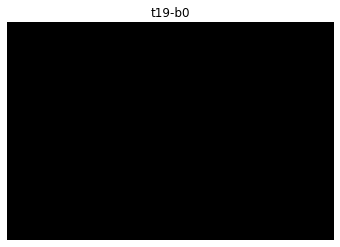

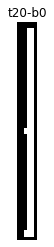

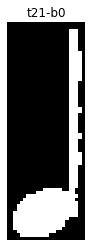

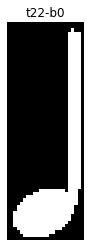

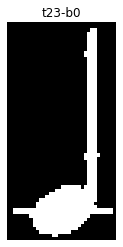

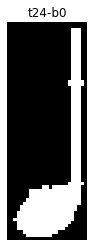

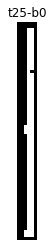

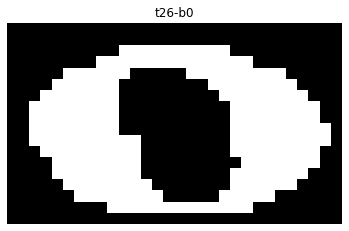

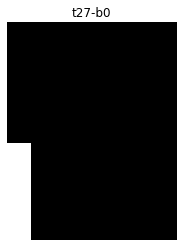

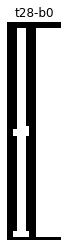

[41, 1348, 136, 270]


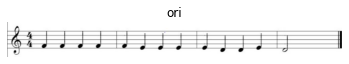

[[1 1 0 ... 0 0 0]
 [1 1 0 ... 0 0 0]
 [1 1 0 ... 0 0 0]
 ...
 [1 1 0 ... 0 0 0]
 [1 1 0 ... 0 0 0]
 [1 1 0 ... 0 0 0]]
shape is  (134, 1307)
shape is  (134, 1307)


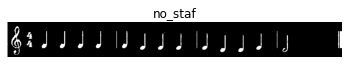

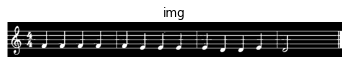

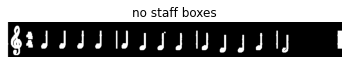

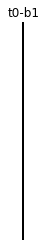

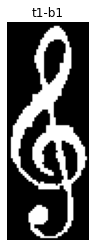

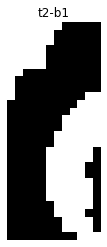

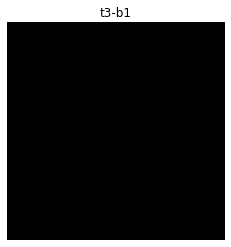

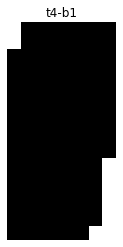

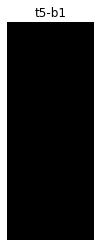

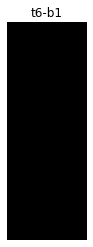

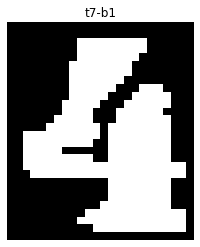

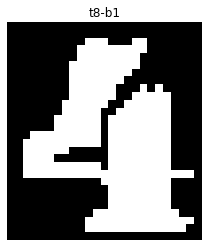

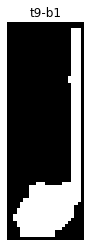

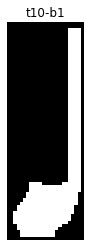

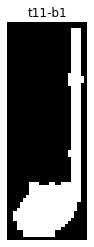

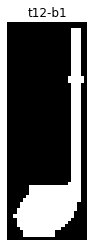

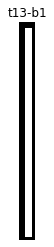

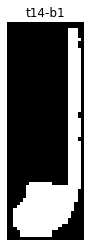

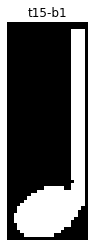

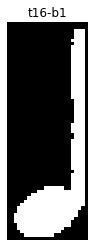

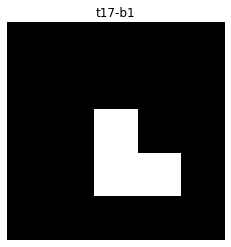

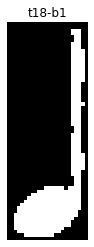

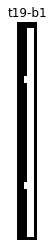

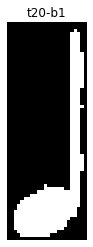

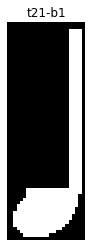

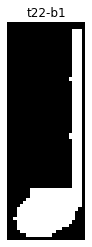

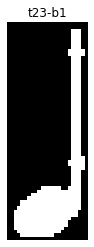

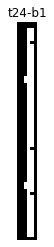

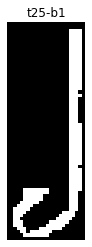

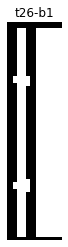

[41, 1348, 278, 412]


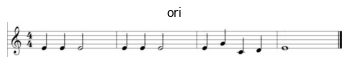

[[1 1 0 ... 0 0 0]
 [1 1 0 ... 0 0 0]
 [1 1 0 ... 0 0 0]
 ...
 [1 1 0 ... 0 0 0]
 [1 1 0 ... 0 0 0]
 [1 1 0 ... 0 0 0]]
shape is  (134, 1307)
shape is  (134, 1307)


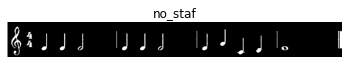

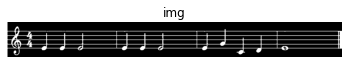

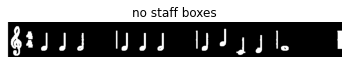

C:\Users\mohammed\projects\music-notes-reader\commonfunctions.py:45: UserWarning: Attempting to set identical left == right == -0.5 results in singular transformations; automatically expanding.
  plt.imshow(image)


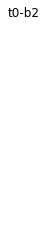

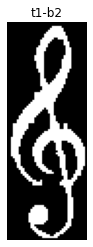

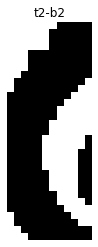

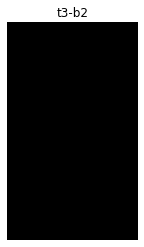

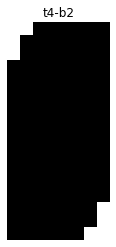

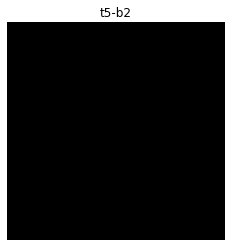

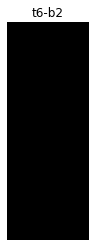

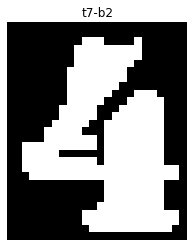

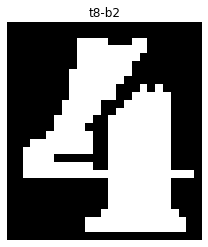

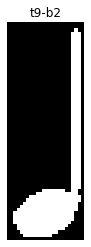

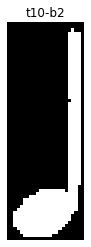

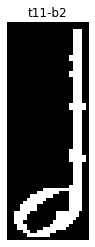

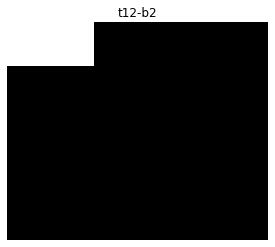

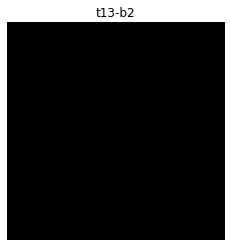

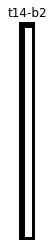

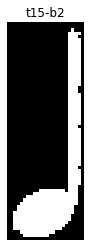

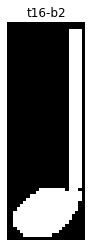

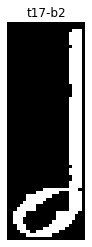

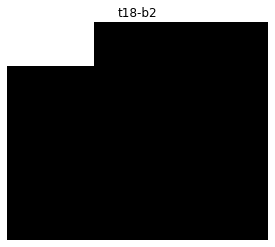

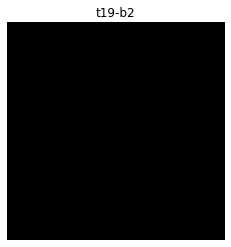

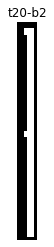

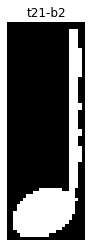

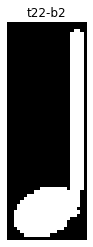

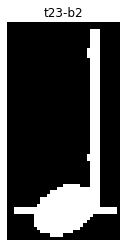

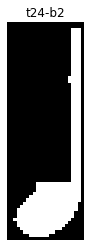

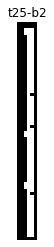

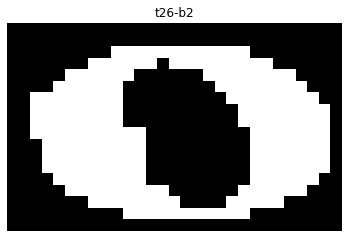

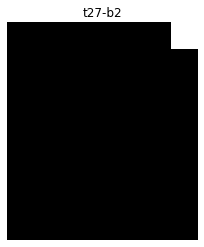

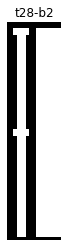

[41, 1348, 422, 555]


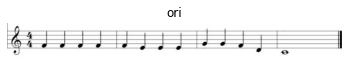

[[1 1 0 ... 0 0 0]
 [1 1 0 ... 0 0 0]
 [1 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
shape is  (133, 1307)
shape is  (133, 1307)


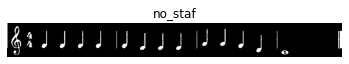

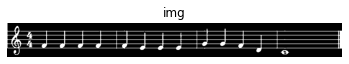

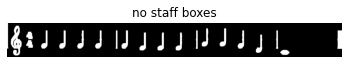

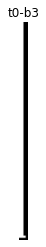

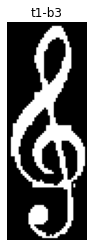

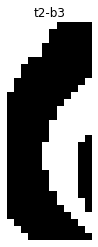

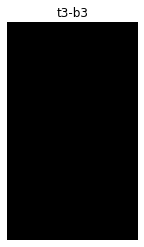

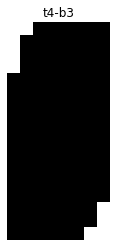

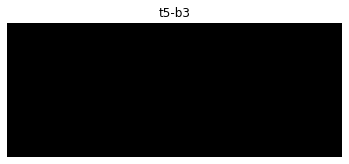

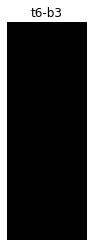

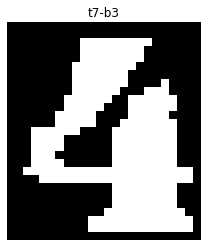

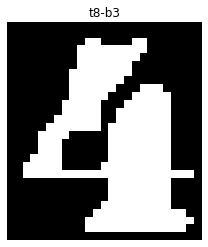

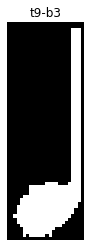

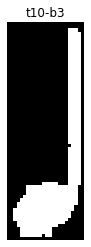

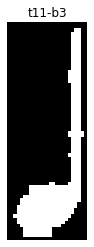

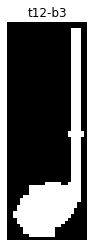

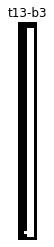

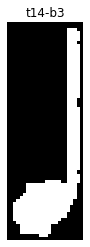

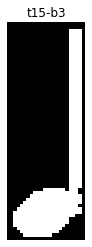

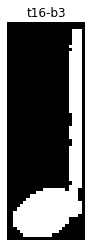

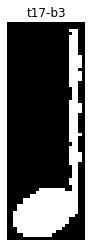

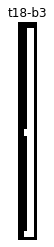

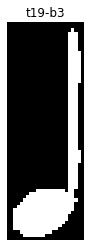

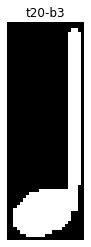

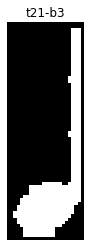

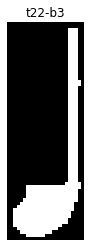

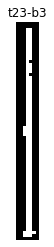

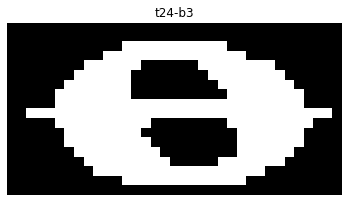

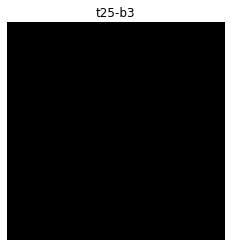

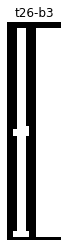

In [159]:
# for each trace segment the individual characters
staff_images = []
gray_staff_images=[]
sh = lambda x: print ("shape is ",x.shape)

for i, trace in enumerate(bigger_trace_bounding_boxes):
    [Xmin, Xmax, Ymin, Ymax] = [x for x in trace]
    print(trace)
    show_images([original_image[Ymin:Ymax,Xmin:Xmax]], ['ori'])
    no_staf_1 = remove_horizontal_lines_old(original_image[Ymin:Ymax,Xmin:Xmax])
    no_staf_2 = remove_horizontal_lines(inverted_image[Ymin:Ymax,Xmin:Xmax],3)
    
    # close the no_staf_2
    no_staf_2 = binary_opening(no_staf_2, rect(2,2))
    no_staf_1[no_staf_1 == 255] = True
    no_staf_1[no_staf_1 == 0] = False
    
    no_staf_2[no_staf_2 == 255] = True
    no_staf_2[no_staf_2 == 0] = False
    org_inverted = inverted_image[Ymin:Ymax,Xmin:Xmax].astype(np.uint8)
    
    org_inverted[org_inverted==100] = True
    org_inverted[org_inverted==0] = False    
    print(no_staf_1)
    
    #show_images([no_staf_1, no_staf_2], ['no_staf1','no_staf2'])
    no_staf = np.bitwise_or(no_staf_1, no_staf_2)
#     no_staf = no_staf_1
    sh(no_staf)
    sh(org_inverted)
    no_staf = np.bitwise_and(no_staf, org_inverted)

    show_images([no_staf], ['no_staf'])
    show_images([inverted_image[Ymin:Ymax,Xmin:Xmax]], ['img'])
    no_staf_boxes = binary_dilation(no_staf, selem=rect(1,10))
    no_staf_boxes = binary_dilation(no_staf, selem=rect(5,5))
    show_images([no_staf_boxes], ['no staff boxes'])
    char_boxes = get_bounding_boxes(no_staf_boxes, (0,200))
    
    j=0
    for box in char_boxes:
        [Xmin, Xmax, Ymin, Ymax] = [x for x in box]
        # remove blank or noisy area that is less than a line of pixels
        char = no_staf[Ymin:Ymax,Xmin:Xmax]
        show_images([char],[f't{j}-b{i}'])
        j+=1
    staff_images.append(inverted_image[Ymin:Ymax,Xmin:Xmax])    
    gray_staff_images.append(gray_image[Ymin:Ymax,Xmin:Xmax])


In [60]:
from skimage import data
from skimage.viewer import ImageViewer

image = original_image
viewer = ImageViewer(image)
viewer.show()

C:\Users\mohammed\anaconda3\lib\site-packages\skimage\viewer\utils\__init__.py:1: UserWarning: Recommended matplotlib backend is `Agg` for full skimage.viewer functionality.
  from .core import *


[]

avg 211.25
1066
1066
1068
1067
1066
1068
1066
1066
1066
1068
repair [[1]
 [1]
 [1]
 [1]
 [1]
 [1]]


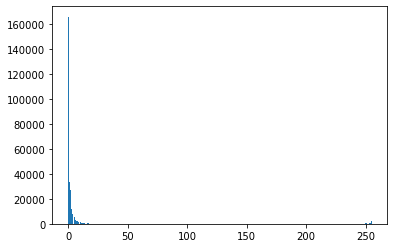

In [149]:
import cv2
def get_avg_contour_areas(contours):
    # returns the areas of all contours as list
    all_areas = []
    for cnt in contours:
        area = cv2.contourArea(cnt)
        all_areas.append(area)
    return  np.average(np.array(all_areas))


image = cv2.imread('images/8th_Sheet1.jpeg')
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Remove horizontal
horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (40,1))

# thresh = cv2.Canny(thresh, 30, 200) 
detected_lines = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, horizontal_kernel, iterations=2)

cnts = cv2.findContours(detected_lines, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

cnts = cnts[0] if len(cnts) == 2 else cnts[1]
# print(cnts)
cont_areas = get_avg_contour_areas(cnts)
print("avg" , cont_areas)
for c in cnts:
    print(len(c))
    cv2.drawContours(image, [c], -1, (255,255,255), 2)
#     cv2.imshow('result', image)
#     cv2.waitKey()
cv2.destroyAllWindows()

laplacian = cv2.Laplacian(thresh,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)


# Repair image
repair_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,6))
print("repair", repair_kernel)
result = cv2.morphologyEx(255 - image, cv2.MORPH_CLOSE, repair_kernel, iterations=1)
kernel = np.ones((1,15),np.uint8)
# er = cv2.dilate(result,kernel,iterations = 1)


showHist(result)
cv2.imshow('sobel=x', sobelx)
cv2.imshow('thresh', thresh)
cv2.imshow('detected_lines', detected_lines)
cv2.imshow('image', image)
# cv2.imshow('er', er)
cv2.imshow('result', result)
cv2.waitKey()
cv2.destroyAllWindows()


In [ ]:
m = [[0, 39, 10, 119], [18, 26, 17, 38], [814, 837, 20, 85], [409, 413, 32, 92], [721, 726, 32, 92], [1034, 1039, 32, 92], [59, 83, 33, 58], [118, 140, 36, 101], [188, 211, 36, 101], [258, 282, 36, 101], [431, 454, 36, 101], [501, 524, 36, 101], [571, 594, 36, 101], [744, 767, 36, 101], [66, 72, 42, 49], [954, 978, 48, 109], [877, 913, 53, 118], [5, 19, 54, 88], [59, 83, 65, 90], [17, 25, 70, 86], [28, 33, 71, 86], [66, 71, 75, 82], [1053, 1081, 85, 101], [577, 587, 87, 99], [1063, 1071, 87, 99], [265, 274, 88, 98]]
def x_min(shape):
    return shape[0]
m = sorted(m, key=x_min)
print(m)